<a href="https://colab.research.google.com/github/Hannah1011/llm-response-clustering/blob/main/PCA%26_UMAP_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
import ast # 문자열로 저장된 리스트 변환을 위함.

In [ ]:
embedding_data = pd.read_csv("/content/human_feedback_embedding_large.csv")

In [ ]:
# 임베딩 열을 리스트 형태로 변환
embedding_data["embedding"] = embedding_data["embedding"].apply(ast.literal_eval) #관련 오류: could not convert string to float
# 임베딩 데이터를 numpy로 변환
embeddings = np.array(embedding_data["embedding"].tolist()) # 관련 오류: setting an array element with a sequence.

In [ ]:
# PCA 변환 (2D & 3D)
pca_2d = PCA(n_components=2)
embedding_pca_2d = pca_2d.fit_transform(embeddings)
pca_3d = PCA(n_components=3)
embedding_pca_3d = pca_3d.fit_transform(embeddings)

In [ ]:
# UMAP 변환
umap_2d = umap.UMAP(n_components= 2)
embedding_UMAP_2d = umap_2d.fit_transform(embeddings)
umap_3d = umap.UMAP(n_components= 3, random_state=42)
embedding_UMAP_3d = umap_3d.fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


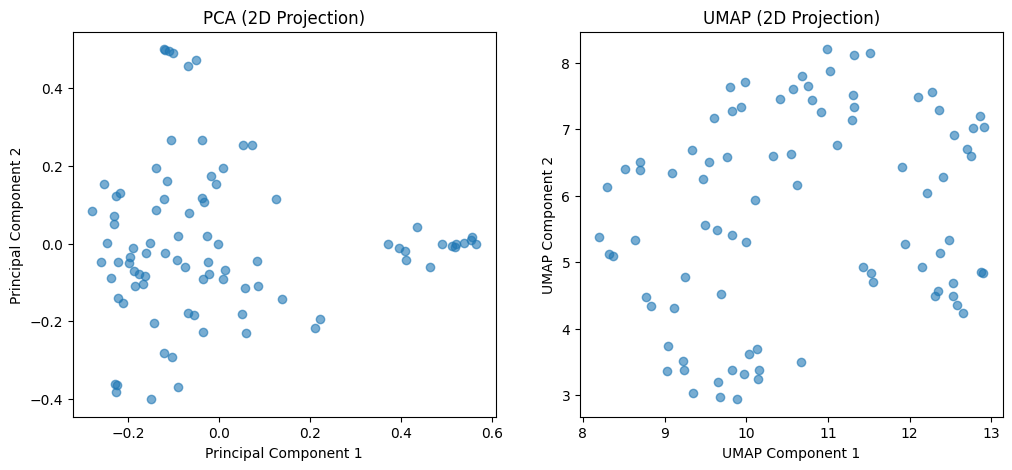

In [ ]:
# 2D 시각화 (PCA & UMAP)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(embedding_pca_2d[:, 0], embedding_pca_2d[:, 1], alpha=0.6)
plt.title("PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(1, 2, 2)
plt.scatter(embedding_UMAP_2d[:, 0], embedding_UMAP_2d[:, 1], alpha=0.6)
plt.title("UMAP (2D Projection)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")

plt.show()

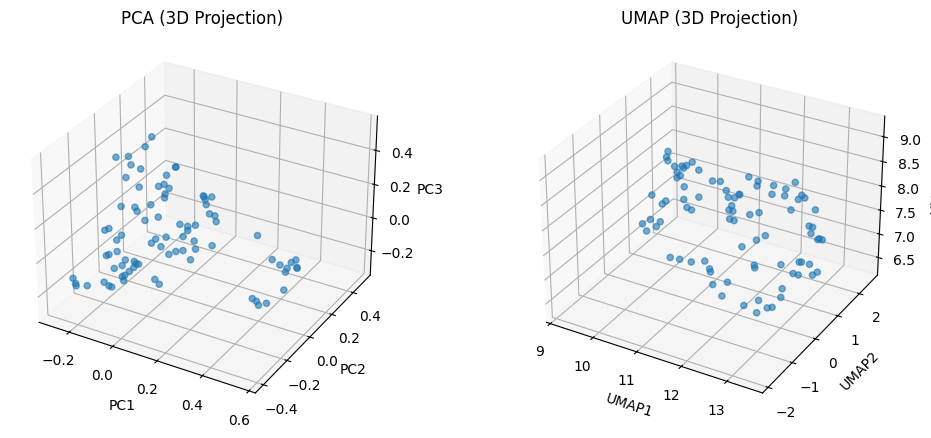

In [ ]:
# 3D 시각화 (PCA & UMAP)
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(embedding_pca_3d[:, 0], embedding_pca_3d[:, 1], embedding_pca_3d[:, 2], alpha=0.6)
ax.set_title("PCA (3D Projection)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(embedding_UMAP_3d[:, 0], embedding_UMAP_3d[:, 1], embedding_UMAP_3d[:, 2], alpha=0.6)
ax.set_title("UMAP (3D Projection)")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_zlabel("UMAP3")

plt.show()